In [96]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
import seaborn as sns

np.random.seed(42)

In [97]:
titanicData = pd.read_csv('train.csv')
titanicData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
#ºnorm_function = lambda x: (x - x.mean())/x.std()

titanicData['Cabin'] = titanicData['Cabin'].fillna(0)

titanicData['Cabin'].loc[titanicData['Cabin'] != 0] = 1

titanicData['Sex'].loc[titanicData['Sex'] == "female"] = 1
titanicData['Sex'].loc[titanicData['Sex'] == "male"] = 0
titanicData['SibSp'].loc[titanicData['SibSp'] <= 0] = 0
titanicData['Age'] = titanicData['Age'].fillna(30)
titanicData['SibSp'].loc[titanicData['SibSp'] > 0] = 1
titanicData['Parch'].loc[titanicData['Parch'] <= 0] = 0
titanicData['Parch'].loc[titanicData['Parch'] > 0] = 1
titanicData= titanicData.drop(columns=['PassengerId','Name', 'Fare', 'Ticket', 'Embarked'])

titanicData.describe()

/Users/juandiaz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.758889,0.317621,0.239057
std,0.486592,0.836071,13.002570,0.465813,0.426747
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,1.000000,1.000000


In [99]:
y= titanicData['Survived'].to_numpy()
X = titanicData[ ['Sex', 'Age', 'Pclass','SibSp', 'Parch', 'Cabin']].to_numpy()
#survived = X[np.where(y==1),:][0]
#plt.plot(*survived,y)

In [100]:
print(X.shape)
print(y.shape)

(891, 6)
(891,)


In [101]:
X_train_validation, X_train = train_test_split(X, test_size=810, random_state=42) 
y_train_validation, y_train = train_test_split(y, test_size=810, random_state=42) 

print(y_train.shape)
print(y_train_validation.shape)
print(X_train.shape)
print(X_train_validation.shape)


(810,)
(81,)
(810, 6)
(81, 6)


In [102]:
tree = DecisionTreeClassifier()
random_forests = BaggingClassifier(tree, n_estimators=100, max_samples=0.09, random_state=42)
random_forests.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.09,
                  n_estimators=100, random_state=42)

In [103]:
y_train_valid_pred = random_forests.predict(X_train_validation)
accuracy_score(y_train_validation,y_train_valid_pred)

0.9135802469135802

In [104]:
test = pd.read_csv('test.csv')
test.head()

prediction = pd.DataFrame(test['PassengerId'])
percept_prediction = pd.DataFrame(test['PassengerId'])

In [105]:
#norm_function = lambda x: (x - x.mean())/x.std()

test['Cabin'] = test['Cabin'].fillna(0)

test['Cabin'].loc[test['Cabin'] != 0] = 1

test['Sex'].loc[test['Sex'] == "female"] = 1
test['Sex'].loc[test['Sex'] == "male"] = 0
test['SibSp'].loc[test['SibSp'] <= 0] = 0
test['SibSp'] = test['SibSp'].fillna(0)
test['Age'] = test['Age'].fillna(30)
test['SibSp'].loc[test['SibSp'] > 0] = 1
test['Parch'].loc[test['Parch'] <= 0] = 0
test['Parch'] = test['Parch'].fillna(0)
test['Parch'].loc[test['Parch'] > 0] = 1
test = test.drop(columns=['PassengerId','Name', 'Fare', 'Ticket', 'Embarked'])

test.head()

/Users/juandiaz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Pclass,Sex,Age,SibSp,Parch,Cabin
0,3,0,34.5,0,0,0
1,3,1,47.0,1,0,0
2,2,0,62.0,0,0,0
3,3,0,27.0,0,0,0
4,3,1,22.0,1,1,0


In [123]:
X_test = test[[ 'Sex', 'Age', 'Pclass','SibSp', 'Parch', 'Cabin']].to_numpy()
X_test = X_test
print(X_test)

random_forests_pred = random_forests.predict(X_test)

prediction['Survived'] = random_forests_pred
compression_opts = dict(method='zip',
                        archive_name='random_forests.csv')  
prediction.to_csv('random_forests.zip', index=False,
          compression=compression_opts)  

pandas = pd.DataFrame(random_forests.predict(X_test))


pandas.describe()

[[0 34.5 3 0 0 0]
 [1 47.0 3 1 0 0]
 [0 62.0 2 0 0 0]
 ...
 [0 38.5 3 0 0 0]
 [0 30.0 3 0 0 0]
 [0 30.0 3 1 1 0]]


,0
count,418.000000
mean,0.325359
std,0.469070
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<AxesSubplot:>

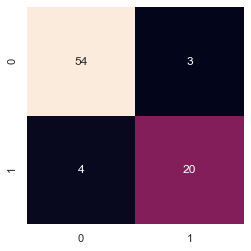

In [107]:
mat = confusion_matrix(y_train_validation, y_train_valid_pred)
sns.set()
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)

0.8903508771929826 





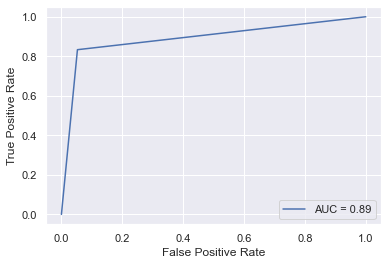

In [108]:
from sklearn.metrics import roc_curve,RocCurveDisplay, roc_auc_score
fpr, tpr, _  = roc_curve(y_train_validation, y_train_valid_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_train_validation, y_train_valid_pred)).plot()
print(roc_auc_score(y_train_validation, y_train_valid_pred),"\n\n\n")

In [109]:
print(mat)

[[54  3]
 [ 4 20]]


In [110]:
y_new = random_forests.predict([[ 1, 25, 2,0, 1, 1]])
print(y_new)

[1]


In [111]:
#Perceptron

perceptron = MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(3000,100), random_state=42, max_iter=1000, learning_rate_init=0.0001, tol=1e-4, activation='relu', verbose=10)

perceptron.fit(X_train, y_train)

Iteration 1, loss = 0.82022058
Iteration 2, loss = 0.73871457
Iteration 3, loss = 0.71658959
Iteration 4, loss = 0.70965860
Iteration 5, loss = 0.70217005
Iteration 6, loss = 0.69654732
Iteration 7, loss = 0.70182369
Iteration 8, loss = 0.68447426
Iteration 9, loss = 0.68988534
Iteration 10, loss = 0.67240032
Iteration 11, loss = 0.66657237
Iteration 12, loss = 0.65780272
Iteration 13, loss = 0.65269995
Iteration 14, loss = 0.64825629
Iteration 15, loss = 0.64131299
Iteration 16, loss = 0.63864696
Iteration 17, loss = 0.63341084
Iteration 18, loss = 0.64428273
Iteration 19, loss = 0.62191225
Iteration 20, loss = 0.61827072
Iteration 21, loss = 0.62560852
Iteration 22, loss = 0.61819598
Iteration 23, loss = 0.60663809
Iteration 24, loss = 0.60427618
Iteration 25, loss = 0.60180204
Iteration 26, loss = 0.60757918
Iteration 27, loss = 0.59247096
Iteration 28, loss = 0.58387775
Iteration 29, loss = 0.58704534
Iteration 30, loss = 0.58327661
Iteration 31, loss = 0.58149189
Iteration 32, los

MLPClassifier(alpha=0.1, hidden_layer_sizes=(3000, 100),
              learning_rate_init=0.0001, max_iter=1000, random_state=42,
              verbose=10)

In [112]:
y_pred_new = perceptron.predict(X_train_validation)

In [113]:
accuracy_score_2 = accuracy_score(y_train_validation, y_pred_new)
print(accuracy_score_2)

0.8888888888888888


<AxesSubplot:>

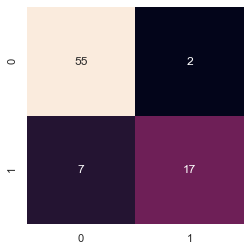

In [114]:
mat = confusion_matrix(y_train_validation, y_pred_new)
sns.set()
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)

0.836622807017544 





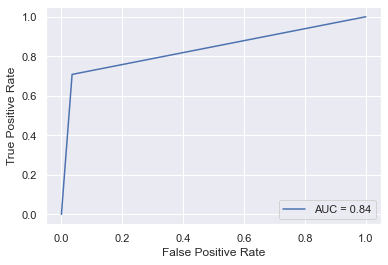

In [115]:
from sklearn.metrics import roc_curve,RocCurveDisplay, roc_auc_score
fpr, tpr, _  = roc_curve(y_train_validation, y_pred_new)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_train_validation, y_pred_new)).plot()
print(roc_auc_score(y_train_validation, y_pred_new),"\n\n\n")

In [124]:
random_forest = random_forests.predict(X_test)

pred_perc = perceptron.predict(X_test)
prediction['Survived'] = pred_perc
compression_opts = dict(method='zip',
                        archive_name='perceptron.csv')  
prediction.to_csv('perceptron.zip', index=False,
          compression=compression_opts)  
print(prediction)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [117]:
import pickle
pickle.dump(random_forests, open('forest.pkl', 'wb'))

In [118]:
pickle.dump(perceptron, open('perceptron.pkl', 'wb'))